In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

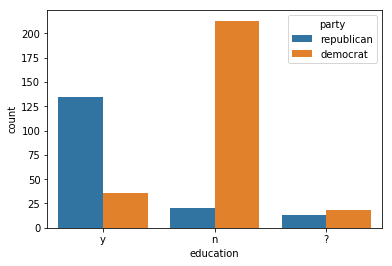

In [19]:
df=pd.read_csv('house-votes-84.csv', header=None, names=['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile','immigration','synfuels','education','superfund','crime','duty_free_exports','eaa_rsa'])
plot1=sns.countplot(data=df, x='education', hue='party')